## WEEK 03, Lecture 01
Revision of last two weeks concepts and implemetation with Project

# Real-World Statistics Project: Cardiovascular Health Analysis

## Project Overview

In this project, we will analyze cardiovascular health data to understand the relationship between various health indicators and the presence of cardiovascular disease. This is a real-world application of statistics that demonstrates how data analysis can support medical research and healthcare decision-making.

### Learning Objectives

By the end of this project, you will understand:

1. How to perform Exploratory Data Analysis (EDA) on real-world datasets
2. Descriptive statistics and their interpretation in a medical context
3. Data visualization techniques for understanding patterns
4. Hypothesis testing to validate research questions
5. Correlation analysis to identify relationships between variables
6. Basic predictive modeling concepts

### Dataset Description

We will use a cardiovascular disease dataset containing the following features:

- **Age**: Patient age in years
- **Gender**: 1 = Female, 2 = Male
- **Height**: Height in centimeters
- **Weight**: Weight in kilograms
- **Systolic Blood Pressure**: Upper blood pressure reading (ap_hi)
- **Diastolic Blood Pressure**: Lower blood pressure reading (ap_lo)
- **Cholesterol**: 1 = Normal, 2 = Above normal, 3 = Well above normal
- **Glucose**: 1 = Normal, 2 = Above normal, 3 = Well above normal
- **Smoking**: Binary (0 = No, 1 = Yes)
- **Alcohol**: Binary (0 = No, 1 = Yes)
- **Physical Activity**: Binary (0 = No, 1 = Yes)
- **Cardiovascular Disease**: Target variable (0 = No, 1 = Yes)

### Why This Project?

Cardiovascular disease is one of the leading causes of death globally. Understanding which factors contribute to cardiovascular disease can help in:

- Early detection and prevention strategies
- Patient education about risk factors
- Healthcare resource allocation
- Development of targeted intervention programs

This makes it an excellent example for demonstrating how statistics can drive real-world impact.

## Step 1: Setting Up the Environment

### What are we doing?

We need to import the necessary Python libraries that will help us analyze the data.

### Libraries Explanation:

- **pandas**: For data manipulation and analysis. Think of it as Excel on big scale.
- **numpy**: For numerical computations and mathematical operations.
- **matplotlib**: For creating static visualizations and plots.
- **seaborn**: Built on top of matplotlib, provides more beautiful and informative statistical graphics.
- **scipy.stats**: Contains statistical functions for hypothesis testing and probability distributions.
- **warnings**: To suppress unnecessary warning messages that might clutter our output.

### Why these libraries?

These are industry-standard tools used by data scientists and statisticians worldwide. They are well-documented, actively maintained, and provide efficient implementations of statistical methods.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")
print("Environment is ready for analysis.")

All libraries imported successfully!
Environment is ready for analysis.


## Step 2: Creating the Dataset

### What are we doing?

We will create a synthetic cardiovascular health dataset that simulates real-world medical data. While we are generating this data programmatically, it follows realistic patterns observed in actual cardiovascular studies.

### Why synthetic data?

1. **Privacy**: Real medical data contains sensitive patient information
2. **Accessibility**: We can create data on-demand without downloading external files
3. **Controlled learning**: We can ensure the data has specific statistical properties for teaching
4. **Reproducibility**: Everyone runs the same analysis with identical results

### Data Generation Strategy:

We use realistic distributions:
- Age follows a normal distribution centered around 55 years
- Blood pressure values reflect medical norms with some variability
- Risk factors (smoking, cholesterol) influence disease probability
- We introduce correlations that exist in real medical data

In [5]:
# Set random seed for reproducibility
# This ensures everyone gets the same "random" data
np.random.seed(42)

# Number of patients in our dataset
n_samples = 1000

# Generate patient data with realistic distributions
data = {
    'age': np.random.normal(55, 10, n_samples).astype(int),  # Mean age 55, std 10 years
    'gender': np.random.choice([1, 2], n_samples, p=[0.48, 0.52]),  # Slightly more males
    'height': np.random.normal(168, 10, n_samples),  # Mean height 168 cm
    'weight': np.random.normal(75, 15, n_samples),  # Mean weight 75 kg
    'ap_hi': np.random.normal(125, 20, n_samples),  # Systolic BP, mean 125 mmHg
    'ap_lo': np.random.normal(82, 12, n_samples),  # Diastolic BP, mean 82 mmHg
    'cholesterol': np.random.choice([1, 2, 3], n_samples, p=[0.50, 0.35, 0.15]),
    'glucose': np.random.choice([1, 2, 3], n_samples, p=[0.55, 0.30, 0.15]),
    'smoking': np.random.choice([0, 1], n_samples, p=[0.75, 0.25]),  # 25% smokers
    'alcohol': np.random.choice([0, 1], n_samples, p=[0.70, 0.30]),  # 30% alcohol users
    'physical_activity': np.random.choice([0, 1], n_samples, p=[0.40, 0.60])  # 60% active
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate BMI (Body Mass Index) - a derived feature ##feature engineering
# BMI = weight(kg) / (height(m))^2
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Generate cardiovascular disease target variable
# We create a probability model based on known risk factors
risk_score = (
    0.02 * df['age'] +  # Age increases risk
    0.3 * (df['gender'] == 2).astype(int) +  # Males at higher risk
    0.02 * df['ap_hi'] +  # High blood pressure increases risk
    0.5 * (df['cholesterol'] == 3).astype(int) +  # High cholesterol increases risk
    0.4 * (df['glucose'] == 3).astype(int) +  # High glucose increases risk
    0.6 * df['smoking'] +  # Smoking increases risk
    -0.3 * df['physical_activity'] +  # Exercise reduces risk
    0.1 * (df['bmi'] > 30).astype(int)  # Obesity increases risk
)

# Convert risk score to probability using logistic function
probability = 1 / (1 + np.exp(-risk_score + 8))  # Offset to get reasonable disease rate

# Generate disease status based on probability
df['cardio'] = (np.random.random(n_samples) < probability).astype(int)

# Clean up unrealistic values (data quality step)
df = df[(df['age'] > 20) & (df['age'] < 90)]  # Keep realistic age range
df = df[(df['ap_hi'] > 80) & (df['ap_hi'] < 200)]  # Realistic blood pressure
df = df[(df['ap_lo'] > 50) & (df['ap_lo'] < 130)]
df = df[df['height'] > 140]  # Realistic height

# Reset index after filtering
df = df.reset_index(drop=True)

print(f"Dataset created successfully with {len(df)} patient records!")
print(f"\nDataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

Dataset created successfully with 978 patient records!

Dataset shape: 978 rows and 13 columns


## Step 3: Initial Data Exploration

### What are we doing?

Before diving into complex analysis, we need to understand what our data looks like. This is called Exploratory Data Analysis (EDA).

### Why is this important?

1. **Data Quality**: Check for missing values, errors, or inconsistencies
2. **Understanding Structure**: See what types of variables we have
3. **Initial Patterns**: Get a first impression of the data distribution
4. **Planning Analysis**: Decide which statistical methods are appropriate

### What to look for:

- Number of records and features , (rows or column)
- Data types (numerical vs categorical)
- Missing values
- Sample of actual data values

In [6]:
# Display basic information about the dataset
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("FIRST 10 ROWS OF DATA")
print("="*60)
print(df.head(10))

print("\n" + "="*60)
print("CHECKING FOR MISSING VALUES")
print("="*60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                978 non-null    int64  
 1   gender             978 non-null    int64  
 2   height             978 non-null    float64
 3   weight             978 non-null    float64
 4   ap_hi              978 non-null    float64
 5   ap_lo              978 non-null    float64
 6   cholesterol        978 non-null    int64  
 7   glucose            978 non-null    int64  
 8   smoking            978 non-null    int64  
 9   alcohol            978 non-null    int64  
 10  physical_activity  978 non-null    int64  
 11  bmi                978 non-null    float64
 12  cardio             978 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 99.5 KB
None

FIRST 10 ROWS OF DATA
   age  gender      height     weight       ap_hi      ap_lo  cholesterol  \

## Step 4: Descriptive Statistics

### What are we doing?

We calculate summary statistics that describe the central tendency, dispersion, and shape of our dataset's distribution.

### Key Statistical Measures Explained:

1. **Count**: Number of non-missing values
2. **Mean**: Average value (sum divided by count)
3. **Standard Deviation (std)**: Measure of spread around the mean
4. **Minimum (min)**: Smallest value
5. **25th Percentile (25%)**: Value below which 25% of data falls
6. **Median (50%)**: Middle value when data is sorted
7. **75th Percentile (75%)**: Value below which 75% of data falls
8. **Maximum (max)**: Largest value

### Why is this useful?

- **Understand data distribution**: Is it centered, spread out, skewed?
- **Identify outliers**: Values far from the mean
- **Compare groups**: How do patients with and without disease differ?
- **Validate data quality**: Check if values make medical sense

### Medical Interpretation:

For example, if mean blood pressure is 180 mmHg, that would indicate data quality issues, as such a high average would be medically unrealistic for a general population.

In [7]:
# Calculate comprehensive descriptive statistics
print("="*60)
print("DESCRIPTIVE STATISTICS FOR ALL NUMERICAL VARIABLES")
print("="*60)
desc_stats = df.describe()
print(desc_stats.round(2))

# Calculate additional statistics not included in describe()
print("\n" + "="*60)
print("ADDITIONAL STATISTICAL MEASURES")
print("="*60)

numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

additional_stats = pd.DataFrame({
    'Variance': df[numerical_cols].var(),
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})

print(additional_stats.round(3))

print("\nInterpretation Guide:")
print("-" * 60)
print("Variance: Higher values indicate more spread in the data")
print("Skewness: 0 = symmetric, positive = right-skewed, negative = left-skewed")
print("Kurtosis: 3 = normal distribution, >3 = heavy tails, <3 = light tails")

DESCRIPTIVE STATISTICS FOR ALL NUMERICAL VARIABLES
          age  gender  height  weight   ap_hi   ap_lo  cholesterol  glucose  \
count  978.00  978.00  978.00  978.00  978.00  978.00       978.00   978.00   
mean    54.64    1.54  168.21   74.96  124.72   81.65         1.60     1.57   
std      9.73    0.50    9.65   15.62   18.62   11.67         0.71     0.73   
min     22.00    1.00  141.64   30.13   80.39   50.50         1.00     1.00   
25%     48.00    1.00  161.55   64.22  112.02   74.07         1.00     1.00   
50%     55.00    2.00  168.15   74.98  125.04   81.49         1.00     1.00   
75%     61.00    2.00  174.69   85.42  137.52   89.42         2.00     2.00   
max     85.00    2.00  199.38  133.89  188.04  119.35         3.00     3.00   

       smoking  alcohol  physical_activity     bmi  cardio  
count   978.00   978.00             978.00  978.00  978.00  
mean      0.24     0.32               0.60   26.74    0.02  
std       0.43     0.47               0.49    6.32    

## Step 5: Disease Prevalence Analysis

### What are we doing?

We are examining the distribution of cardiovascular disease in our dataset. This is a fundamental epidemiological measure.

### Key Concepts:

1. **Prevalence**: The proportion of a population that has a disease at a specific time
2. **Count vs Proportion**: Both absolute numbers and percentages are important

### Why is this important?

- **Baseline understanding**: Know how common the disease is
- **Class balance**: Important for statistical modeling
- **Public health perspective**: Understand disease burden
- **Comparison**: Compare to real-world cardiovascular disease rates

### Real-World Context:

According to the World Health Organization, cardiovascular diseases are the leading cause of death globally, affecting approximately 32% of all deaths. Understanding prevalence helps in healthcare planning and resource allocation.

In [8]:
# Calculate disease prevalence
disease_counts = df['cardio'].value_counts()
disease_percentages = df['cardio'].value_counts(normalize=True) * 100

print("="*60)
print("CARDIOVASCULAR DISEASE PREVALENCE")
print("="*60)
print("\nAbsolute Counts:")
print(f"  No Disease (0): {disease_counts[0]} patients")
print(f"  Has Disease (1): {disease_counts[1]} patients")

print("\nPercentage Distribution:")
print(f"  No Disease (0): {disease_percentages[0]:.2f}%")
print(f"  Has Disease (1): {disease_percentages[1]:.2f}%")

print("\nInterpretation:")
print(f"  In our sample of {len(df)} patients, {disease_percentages[1]:.1f}% have")
print(f"  cardiovascular disease. This represents a significant health burden.")

CARDIOVASCULAR DISEASE PREVALENCE

Absolute Counts:
  No Disease (0): 957 patients
  Has Disease (1): 21 patients

Percentage Distribution:
  No Disease (0): 97.85%
  Has Disease (1): 2.15%

Interpretation:
  In our sample of 978 patients, 2.1% have
  cardiovascular disease. This represents a significant health burden.


## Step 6: Comparative Statistics by Disease Status

### What are we doing?

We compare the average values of health indicators between patients with and without cardiovascular disease.

### Why group by disease status?

1. **Identify risk factors**: Which variables differ between groups?
2. **Generate hypotheses**: What might cause these differences?
3. **Inform testing**: Which comparisons should we test statistically?
4. **Clinical insights**: What characterizes high-risk patients?

### What to look for:

- Large differences in means between groups
- Variables with consistent patterns
- Unexpected findings that contradict medical knowledge

### Statistical Note:

Just because we see a difference in means does not automatically mean it is statistically significant. We will test this formally in the hypothesis testing section.

In [9]:
# Compare health indicators by disease status
print("="*60)
print("COMPARISON OF HEALTH INDICATORS BY DISEASE STATUS")
print("="*60)

comparison = df.groupby('cardio')[numerical_cols].mean()
print("\nMean values:")
print(comparison.round(2))

# Calculate the difference between groups
print("\n" + "="*60)
print("DIFFERENCE IN MEANS (Disease - No Disease)")
print("="*60)
difference = comparison.loc[1] - comparison.loc[0]
print(difference.round(2))

print("\nInterpretation:")
print("-" * 60)
print("Positive values: Higher in disease group")
print("Negative values: Lower in disease group")
print("\nKey observations:")
for col in numerical_cols:
    diff = difference[col]
    direction = "higher" if diff > 0 else "lower"
    print(f"  {col}: {abs(diff):.2f} units {direction} in disease group")

COMPARISON OF HEALTH INDICATORS BY DISEASE STATUS

Mean values:
          age  height  weight   ap_hi  ap_lo    bmi
cardio                                             
0       54.64  168.30    75.0  124.61  81.60  26.72
1       54.52  163.87    73.1  129.67  84.08  27.55

DIFFERENCE IN MEANS (Disease - No Disease)
age      -0.12
height   -4.44
weight   -1.90
ap_hi     5.06
ap_lo     2.48
bmi       0.83
dtype: float64

Interpretation:
------------------------------------------------------------
Positive values: Higher in disease group
Negative values: Lower in disease group

Key observations:
  age: 0.12 units lower in disease group
  height: 4.44 units lower in disease group
  weight: 1.90 units lower in disease group
  ap_hi: 5.06 units higher in disease group
  ap_lo: 2.48 units higher in disease group
  bmi: 0.83 units higher in disease group


## Step 7: Data Visualization - Distribution Analysis

### What are we doing?

We create visual representations of our data to better understand distributions and patterns.

### Types of Visualizations:

1. **Histograms**: Show the frequency distribution of a single variable
2. **Box plots**: Display the median, quartiles, and outliers
3. **Comparison plots**: Show distributions side-by-side for disease groups

### Why visualize?

"A picture is worth a thousand words" - Visualizations help us:
- Quickly identify patterns
- Spot outliers and anomalies
- Understand data distribution shapes
- Communicate findings effectively

### Reading the plots:

- **Histogram bars**: Height shows how many data points fall in that range
- **Box plot box**: Contains middle 50% of data
- **Box plot line**: Represents the median
- **Box plot whiskers**: Extend to min/max or 1.5 times IQR
- **Box plot dots**: Individual outlier points

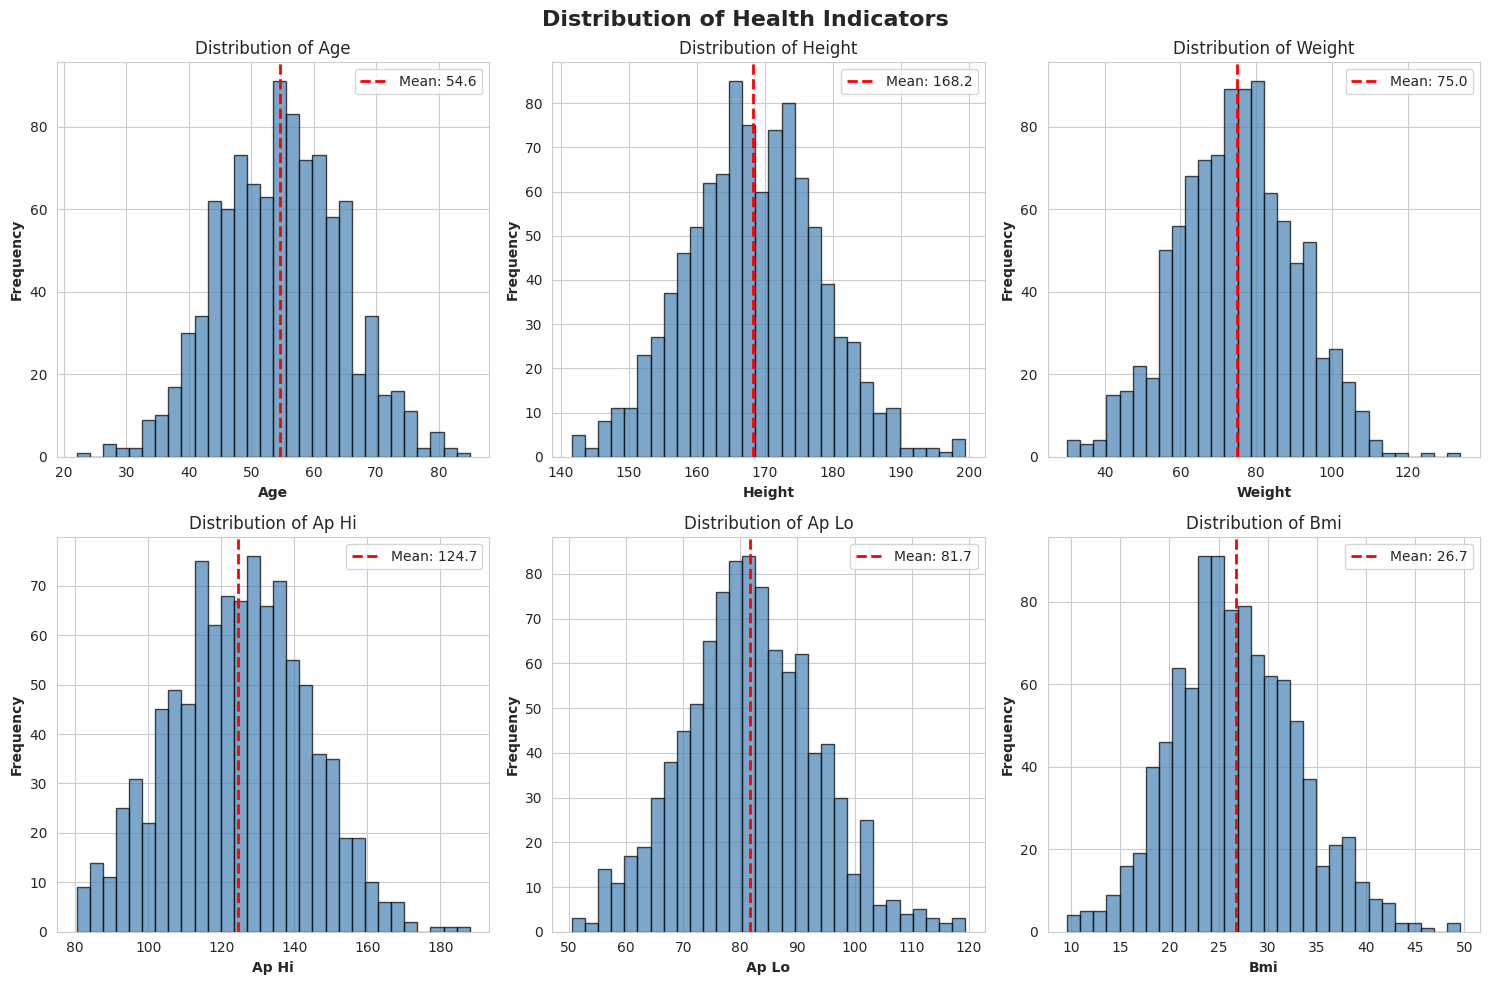

Interpretation Guide:
------------------------------------------------------------
Look for:
  - Bell-shaped curves (normal distribution)
  - Skewed distributions (tail on one side)
  - Multiple peaks (bimodal distributions)
  - Outliers (isolated bars far from the center)


In [10]:
# Create histograms for key numerical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Health Indicators', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_xlabel(col.replace('_', ' ').title(), fontweight='bold')
    axes[row, col_idx].set_ylabel('Frequency', fontweight='bold')
    axes[row, col_idx].set_title(f'Distribution of {col.replace("_", " ").title()}')

    # Add mean line
    mean_val = df[col].mean()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

print("Interpretation Guide:")
print("-" * 60)
print("Look for:")
print("  - Bell-shaped curves (normal distribution)")
print("  - Skewed distributions (tail on one side)")
print("  - Multiple peaks (bimodal distributions)")
print("  - Outliers (isolated bars far from the center)")

## Step 8: Box Plots by Disease Status

### What are we doing?

Creating box plots that compare the distribution of health indicators between patients with and without cardiovascular disease.

### Why box plots?

Box plots are excellent for comparing distributions because they show:
1. **Central tendency**: The median (middle line)
2. **Spread**: The interquartile range (box height)
3. **Skewness**: Position of median within the box
4. **Outliers**: Individual points outside whiskers

### Comparison strategy:

By placing disease and non-disease groups side-by-side, we can visually assess:
- Whether medians differ substantially
- Whether one group has more variability
- Whether distributions overlap or are distinct

### Alternative methods:

We could also use:
- Violin plots (show full distribution shape)
- Strip plots (show individual data points)
- Swarm plots (like strip plots but avoid overlapping)

We chose box plots because they provide a good balance of detail and clarity for teaching purposes.

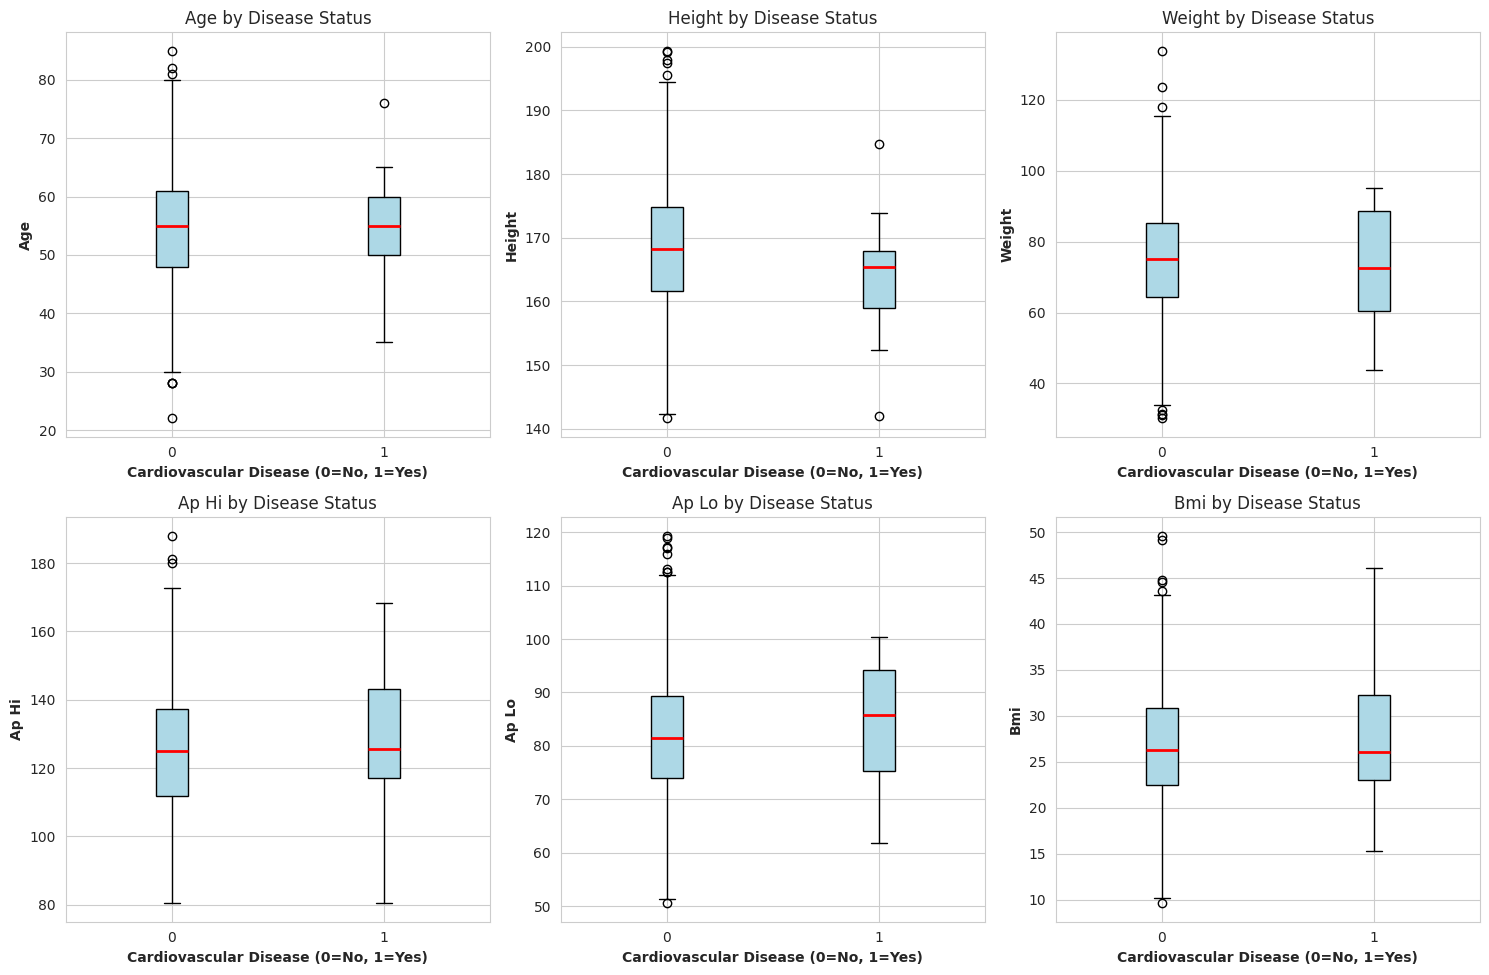

How to read these plots:
------------------------------------------------------------
Box components:
  - Bottom of box: 25th percentile (Q1)
  - Red line in box: Median (50th percentile)
  - Top of box: 75th percentile (Q3)
  - Whiskers: Extend to 1.5 * IQR from quartiles
  - Circles: Outlier values beyond whiskers

Comparison tips:
  - Compare median positions between groups
  - Look for overlap between boxes
  - Note differences in box heights (variability)


In [11]:
# Create box plots comparing disease groups
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Health Indicators Comparison: With vs Without Cardiovascular Disease',
             fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3

    # Create box plot
    df.boxplot(column=col, by='cardio', ax=axes[row, col_idx],
               patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='black'),
               medianprops=dict(color='red', linewidth=2),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'))

    axes[row, col_idx].set_xlabel('Cardiovascular Disease (0=No, 1=Yes)', fontweight='bold')
    axes[row, col_idx].set_ylabel(col.replace('_', ' ').title(), fontweight='bold')
    axes[row, col_idx].set_title(f'{col.replace("_", " ").title()} by Disease Status')
    plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

print("How to read these plots:")
print("-" * 60)
print("Box components:")
print("  - Bottom of box: 25th percentile (Q1)")
print("  - Red line in box: Median (50th percentile)")
print("  - Top of box: 75th percentile (Q3)")
print("  - Whiskers: Extend to 1.5 * IQR from quartiles")
print("  - Circles: Outlier values beyond whiskers")
print("\nComparison tips:")
print("  - Compare median positions between groups")
print("  - Look for overlap between boxes")
print("  - Note differences in box heights (variability)")

## Step 9: Correlation Analysis

### What are we doing?

Calculating correlation coefficients to measure the strength and direction of linear relationships between variables.

### Understanding Correlation:

The correlation coefficient (Pearson's r) ranges from -1 to +1:
- **+1**: Perfect positive correlation (as X increases, Y increases)
- **0**: No linear correlation
- **-1**: Perfect negative correlation (as X increases, Y decreases)

### Interpretation Guidelines:

- **0.00 to 0.19**: Very weak correlation
- **0.20 to 0.39**: Weak correlation
- **0.40 to 0.59**: Moderate correlation
- **0.60 to 0.79**: Strong correlation
- **0.80 to 1.00**: Very strong correlation

### Important Note:

**Correlation does not imply causation!** Just because two variables are correlated does not mean one causes the other. There could be:
- A third variable causing both
- Reverse causation
- Coincidental correlation

### Why is this useful?

1. **Feature selection**: Identify which variables relate to disease
2. **Multicollinearity detection**: Find highly correlated predictors
3. **Pattern recognition**: Discover unexpected relationships
4. **Hypothesis generation**: Suggest areas for further investigation

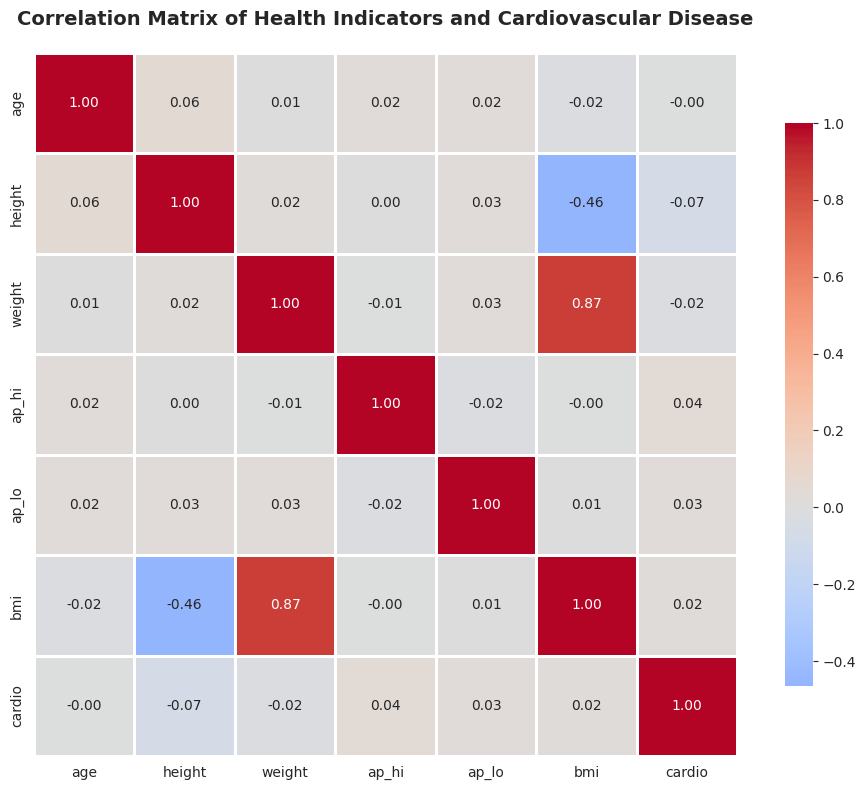

CORRELATION WITH CARDIOVASCULAR DISEASE

Correlation coefficients (sorted by strength):

  ap_hi               :  0.039  [Very Weak    positive]
  ap_lo               :  0.031  [Very Weak    positive]
  bmi                 :  0.019  [Very Weak    positive]
  age                 : -0.002  [Very Weak    negative]
  weight              : -0.018  [Very Weak    negative]
  height              : -0.067  [Very Weak    negative]

Interpretation:
------------------------------------------------------------
Positive correlation: Higher values associated with more disease
Negative correlation: Higher values associated with less disease


In [12]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols + ['cardio']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Health Indicators and Cardiovascular Disease',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display correlations with cardiovascular disease
print("="*60)
print("CORRELATION WITH CARDIOVASCULAR DISEASE")
print("="*60)
cardio_correlations = correlation_matrix['cardio'].drop('cardio').sort_values(ascending=False)
print("\nCorrelation coefficients (sorted by strength):\n")
for var, corr in cardio_correlations.items():
    strength = "Very Strong" if abs(corr) > 0.8 else "Strong" if abs(corr) > 0.6 else "Moderate" if abs(corr) > 0.4 else "Weak" if abs(corr) > 0.2 else "Very Weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"  {var:20s}: {corr:6.3f}  [{strength:12s} {direction:8s}]")

print("\nInterpretation:")
print("-" * 60)
print("Positive correlation: Higher values associated with more disease")
print("Negative correlation: Higher values associated with less disease")

## Step 10: Hypothesis Testing - T-Tests

### What are we doing?

Performing independent samples t-tests to determine if the observed differences between disease groups are statistically significant.

### The Scientific Method:

1. **Null Hypothesis (H₀)**: There is no difference in means between groups
2. **Alternative Hypothesis (H₁)**: There is a significant difference in means
3. **Test Statistic**: Calculate t-value from sample data
4. **P-value**: Probability of observing our data if H₀ is true
5. **Decision**: Reject H₀ if p-value < significance level (usually 0.05)

### Understanding P-values:

- **p < 0.001**: Very strong evidence against null hypothesis (***)
- **p < 0.01**: Strong evidence (**)
- **p < 0.05**: Moderate evidence (*)
- **p ≥ 0.05**: Insufficient evidence to reject null hypothesis

### Why t-test?

The t-test is appropriate when:
- Comparing means of two independent groups
- Data is approximately normally distributed
- We want to test for a difference in central tendency

### Alternative Methods:

If assumptions are violated, we could use:
- **Mann-Whitney U test**: Non-parametric alternative for non-normal data
- **Welch's t-test**: When variances are unequal between groups
- **Bootstrap methods**: For small samples or unusual distributions

### Important Considerations:

1. **Statistical vs Practical Significance**: A result can be statistically significant but have little practical importance
2. **Multiple Comparisons**: Testing many hypotheses increases false positive risk
3. **Sample Size**: Larger samples make it easier to detect small differences

In [13]:
# Perform t-tests for each numerical variable
print("="*80)
print("INDEPENDENT SAMPLES T-TESTS")
print("Testing: Do health indicators differ between disease groups?")
print("="*80)

# Separate data by disease status
no_disease = df[df['cardio'] == 0]
has_disease = df[df['cardio'] == 1]

print("\nResults:\n")
print(f"{'Variable':<20} {'Mean (No)':<12} {'Mean (Yes)':<12} {'t-stat':<10} {'p-value':<12} {'Significant?'}")
print("-" * 80)

results = []
for col in numerical_cols:
    # Extract groups
    group0 = no_disease[col].dropna()
    group1 = has_disease[col].dropna()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group0, group1)

    # Determine significance
    if p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "No"

    mean0 = group0.mean()
    mean1 = group1.mean()

    print(f"{col:<20} {mean0:<12.2f} {mean1:<12.2f} {t_stat:<10.3f} {p_value:<12.6f} {sig}")

    results.append({
        'variable': col,
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

print("\n" + "="*80)
print("INTERPRETATION GUIDE")
print("="*80)
print("Significance levels:")
print("  *** : p < 0.001 (very strong evidence)")
print("  **  : p < 0.01  (strong evidence)")
print("  *   : p < 0.05  (moderate evidence)")
print("  No  : p ≥ 0.05  (insufficient evidence)")
print("\nNull Hypothesis (H₀): No difference in means between disease groups")
print("Alternative Hypothesis (H₁): Means differ between groups")
print("\nConclusion:")
significant_vars = [r['variable'] for r in results if r['significant']]
print(f"  {len(significant_vars)} out of {len(numerical_cols)} variables show")
print(f"  statistically significant differences between disease groups.")
print(f"\n  Significant variables: {', '.join(significant_vars)}")

INDEPENDENT SAMPLES T-TESTS
Testing: Do health indicators differ between disease groups?

Results:

Variable             Mean (No)    Mean (Yes)   t-stat     p-value      Significant?
--------------------------------------------------------------------------------
age                  54.64        54.52        0.055      0.955867     No
height               168.30       163.87       2.088      0.037059     *
weight               75.00        73.10        0.550      0.582236     No
ap_hi                124.61       129.67       -1.232     0.218336     No
ap_lo                81.60        84.08        -0.965     0.334747     No
bmi                  26.72        27.55        -0.594     0.552925     No

INTERPRETATION GUIDE
Significance levels:
  *** : p < 0.001 (very strong evidence)
  **  : p < 0.01  (strong evidence)
  *   : p < 0.05  (moderate evidence)
  No  : p ≥ 0.05  (insufficient evidence)

Null Hypothesis (H₀): No difference in means between disease groups
Alternative Hypothesis 

## Step 11: Categorical Variable Analysis - Chi-Square Tests

### What are we doing?

Examining the relationship between categorical risk factors (smoking, alcohol, physical activity) and cardiovascular disease using chi-square tests of independence.

### Chi-Square Test Explained:

The chi-square test determines whether there is a significant association between two categorical variables.

**Null Hypothesis (H₀)**: The two variables are independent (not associated)
**Alternative Hypothesis (H₁)**: The two variables are associated

### How it works:

1. Create a contingency table (cross-tabulation)
2. Calculate expected frequencies if variables were independent
3. Compare observed vs expected frequencies
4. Calculate chi-square statistic: χ² = Σ((Observed - Expected)² / Expected)
5. Determine p-value from chi-square distribution

### Why is this different from t-test?

- **T-test**: Compares means of continuous variables
- **Chi-square**: Tests association between categorical variables

### Assumptions:

1. Data is categorical
2. Observations are independent
3. Expected frequencies are sufficiently large (usually >5)

### Medical Context:

Understanding lifestyle factors (smoking, drinking, exercise) helps in:
- Designing prevention programs
- Patient counseling
- Public health policy

In [14]:
# Analyze categorical variables
categorical_vars = ['smoking', 'alcohol', 'physical_activity', 'cholesterol', 'glucose']

print("="*80)
print("CHI-SQUARE TESTS OF INDEPENDENCE")
print("Testing: Are lifestyle factors associated with cardiovascular disease?")
print("="*80)

for var in categorical_vars:
    print(f"\n{'='*80}")
    print(f"Analysis: {var.upper().replace('_', ' ')}")
    print(f"{'='*80}")

    # Create contingency table
    contingency_table = pd.crosstab(df[var], df['cardio'])
    print("\nContingency Table:")
    contingency_table.columns = ['No Disease', 'Has Disease']
    print(contingency_table)

    # Calculate percentages
    print("\nPercentages (by row):")
    percentages = pd.crosstab(df[var], df['cardio'], normalize='index') * 100
    percentages.columns = ['No Disease %', 'Has Disease %']
    print(percentages.round(2))

    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"P-value: {p_value:.6f}")

    if p_value < 0.001:
        print("Result: *** HIGHLY SIGNIFICANT (p < 0.001)")
        print(f"Conclusion: Strong evidence that {var} is associated with cardiovascular disease.")
    elif p_value < 0.01:
        print("Result: ** SIGNIFICANT (p < 0.01)")
        print(f"Conclusion: {var} is significantly associated with cardiovascular disease.")
    elif p_value < 0.05:
        print("Result: * SIGNIFICANT (p < 0.05)")
        print(f"Conclusion: {var} shows a significant association with cardiovascular disease.")
    else:
        print("Result: NOT SIGNIFICANT (p ≥ 0.05)")
        print(f"Conclusion: Insufficient evidence that {var} is associated with cardiovascular disease.")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print("The chi-square test helps us understand which lifestyle factors")
print("are statistically associated with cardiovascular disease risk.")

CHI-SQUARE TESTS OF INDEPENDENCE
Testing: Are lifestyle factors associated with cardiovascular disease?

Analysis: SMOKING

Contingency Table:
         No Disease  Has Disease
smoking                         
0               727           18
1               230            3

Percentages (by row):
         No Disease %  Has Disease %
smoking                             
0               97.58           2.42
1               98.71           1.29

Chi-square statistic: 0.6058
Degrees of freedom: 1
P-value: 0.436373
Result: NOT SIGNIFICANT (p ≥ 0.05)
Conclusion: Insufficient evidence that smoking is associated with cardiovascular disease.

Analysis: ALCOHOL

Contingency Table:
         No Disease  Has Disease
alcohol                         
0               647           14
1               310            7

Percentages (by row):
         No Disease %  Has Disease %
alcohol                             
0               97.88           2.12
1               97.79           2.21

Chi-square stati

## Step 12: Effect Size Calculation - Cohen's d

### What are we doing?

Calculating effect sizes to measure the magnitude of differences between groups, not just whether they are statistically significant.

### The Problem with P-values Alone:

P-values tell us if a difference exists, but not how large or important it is. With large sample sizes, even tiny, meaningless differences can be "statistically significant."

### Cohen's d Explained:

Cohen's d measures the difference between two means in terms of standard deviation units.

**Formula**: d = (Mean₁ - Mean₂) / Pooled Standard Deviation

### Interpretation Guidelines (Cohen, 1988):

- **|d| < 0.2**: Negligible effect
- **0.2 ≤ |d| < 0.5**: Small effect
- **0.5 ≤ |d| < 0.8**: Medium effect
- **|d| ≥ 0.8**: Large effect

### Why is this important?

1. **Clinical significance**: A statistically significant finding might not be clinically meaningful
2. **Practical relevance**: Helps determine if results matter in real-world applications
3. **Comparison**: Allows comparison across different studies and measures
4. **Sample size planning**: Used in power analysis for future studies

### Example:

If blood pressure differs by 2 mmHg between groups with p < 0.001, it is statistically significant but might not be clinically important. Cohen's d would be small, alerting us that the practical impact is limited.

### Alternative Effect Size Measures:

- **Hedge's g**: Corrected version of Cohen's d for small samples
- **Glass's Δ**: Uses control group SD only
- **Odds Ratio**: For categorical outcomes
- **R²**: Proportion of variance explained

In [15]:
# Calculate Cohen's d for effect size
def cohens_d(group1, group2):
    """
    Calculate Cohen's d effect size.

    Parameters:
    group1, group2: arrays of values for two groups

    Returns:
    Cohen's d value
    """
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)

    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

print("="*80)
print("EFFECT SIZE ANALYSIS (Cohen's d)")
print("Measuring the magnitude of differences between disease groups")
print("="*80)

print("\nResults:\n")
print(f"{'Variable':<20} {'Cohen\'s d':<12} {'Effect Size':<20} {'Interpretation'}")
print("-" * 80)

for col in numerical_cols:
    group0 = no_disease[col].dropna()
    group1 = has_disease[col].dropna()

    d = cohens_d(group1, group0)

    # Classify effect size
    if abs(d) < 0.2:
        effect = "Negligible"
    elif abs(d) < 0.5:
        effect = "Small"
    elif abs(d) < 0.8:
        effect = "Medium"
    else:
        effect = "Large"

    # Interpretation
    direction = "higher" if d > 0 else "lower"
    interpretation = f"{abs(d):.2f} SD {direction} in disease group"

    print(f"{col:<20} {d:<12.3f} {effect:<20} {interpretation}")

print("\n" + "="*80)
print("INTERPRETATION GUIDE")
print("="*80)
print("Cohen's d interpretation (absolute value):")
print("  < 0.2   : Negligible effect (difference too small to matter)")
print("  0.2-0.5 : Small effect (noticeable but modest difference)")
print("  0.5-0.8 : Medium effect (moderate, practically significant)")
print("  ≥ 0.8   : Large effect (substantial, clinically important)")
print("\nKey Point:")
print("  Statistical significance (p-value) tells us if a difference exists.")
print("  Effect size tells us if that difference is large enough to matter.")
print("\nClinical Relevance:")
print("  Variables with large effect sizes should be priorities for")
print("  intervention, monitoring, and patient education.")

EFFECT SIZE ANALYSIS (Cohen's d)
Measuring the magnitude of differences between disease groups

Results:

Variable             Cohen's d    Effect Size          Interpretation
--------------------------------------------------------------------------------
age                  -0.012       Negligible           0.01 SD lower in disease group
height               -0.461       Small                0.46 SD lower in disease group
weight               -0.121       Negligible           0.12 SD lower in disease group
ap_hi                0.272        Small                0.27 SD higher in disease group
ap_lo                0.213        Small                0.21 SD higher in disease group
bmi                  0.131        Negligible           0.13 SD higher in disease group

INTERPRETATION GUIDE
Cohen's d interpretation (absolute value):
  < 0.2   : Negligible effect (difference too small to matter)
  0.2-0.5 : Small effect (noticeable but modest difference)
  0.5-0.8 : Medium effect (moderate,

## Step 13: Risk Factor Visualization

### What are we doing?

Creating visual representations to show how lifestyle factors relate to cardiovascular disease prevalence.

### Types of Plots:

1. **Count plots**: Show the number of cases in each category
2. **Percentage plots**: Show disease prevalence rates
3. **Grouped comparisons**: Compare multiple factors side-by-side

### Why visualize categorical data?

- **Pattern recognition**: Quickly identify high-risk groups
- **Communication**: Easier to explain to non-technical audiences
- **Impact**: Visual stories are more memorable than tables
- **Comparison**: See relative risk across different factors

### Reading the charts:

- **Height of bars**: Shows the count or percentage
- **Colors**: Distinguish between disease status groups
- **Grouped bars**: Allow direct comparison between categories

### What to look for:

- Large differences in disease rates between factor levels
- Consistent patterns across multiple factors
- Unexpected or counterintuitive relationships

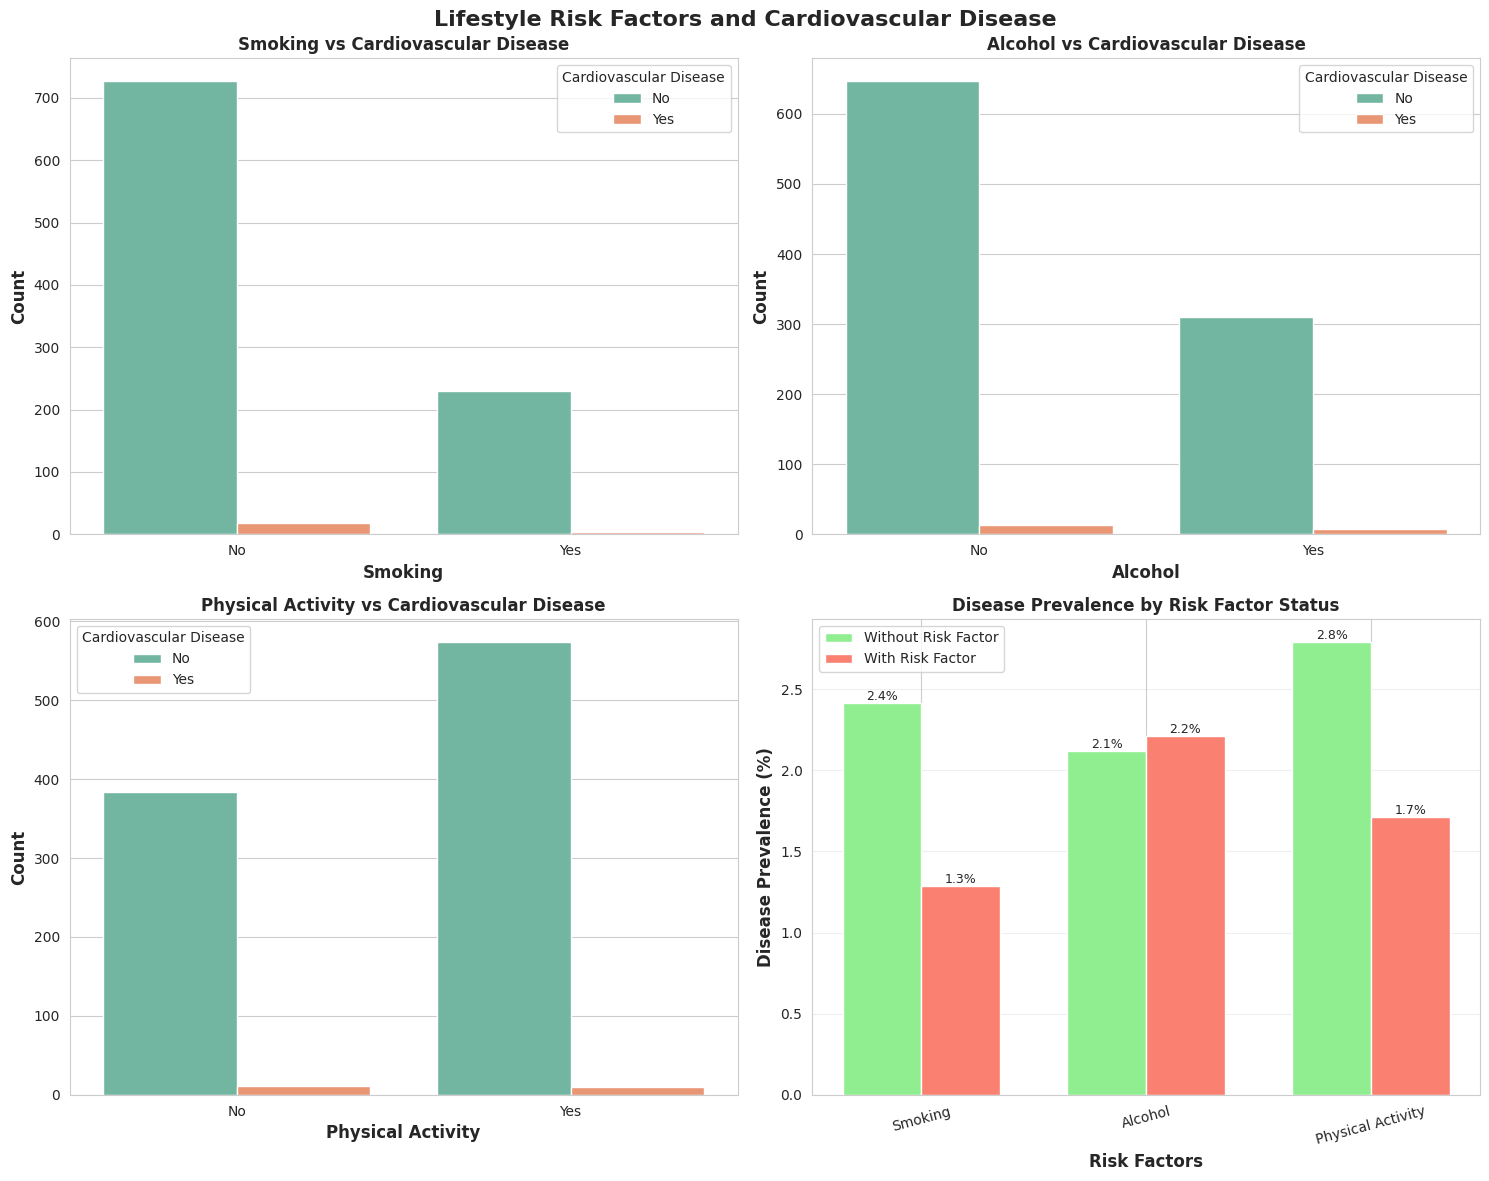

Interpretation:
------------------------------------------------------------
The comparison plot shows disease prevalence rates for people
with and without each risk factor. Larger differences indicate
stronger associations with cardiovascular disease.


In [16]:
# Create visualizations for categorical risk factors
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Lifestyle Risk Factors and Cardiovascular Disease', fontsize=16, fontweight='bold')

risk_factors = ['smoking', 'alcohol', 'physical_activity']

for idx, var in enumerate(risk_factors):
    row = idx // 2
    col = idx % 2

    # Create count plot
    sns.countplot(data=df, x=var, hue='cardio', ax=axes[row, col], palette='Set2')
    axes[row, col].set_xlabel(var.replace('_', ' ').title(), fontweight='bold', fontsize=12)
    axes[row, col].set_ylabel('Count', fontweight='bold', fontsize=12)
    axes[row, col].set_title(f'{var.replace("_", " ").title()} vs Cardiovascular Disease',
                            fontweight='bold')
    axes[row, col].legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
    axes[row, col].set_xticklabels(['No', 'Yes'])

# Create a summary comparison plot
ax = axes[1, 1]

# Calculate disease rates for each risk factor
risk_data = []
for var in risk_factors:
    rate_no = df[df[var] == 0]['cardio'].mean() * 100
    rate_yes = df[df[var] == 1]['cardio'].mean() * 100
    risk_data.append({'Factor': var.replace('_', ' ').title(),
                     'Without Risk': rate_no,
                     'With Risk': rate_yes})

risk_comparison = pd.DataFrame(risk_data)

x = np.arange(len(risk_factors))
width = 0.35

bars1 = ax.bar(x - width/2, risk_comparison['Without Risk'], width,
               label='Without Risk Factor', color='lightgreen')
bars2 = ax.bar(x + width/2, risk_comparison['With Risk'], width,
               label='With Risk Factor', color='salmon')

ax.set_xlabel('Risk Factors', fontweight='bold', fontsize=12)
ax.set_ylabel('Disease Prevalence (%)', fontweight='bold', fontsize=12)
ax.set_title('Disease Prevalence by Risk Factor Status', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f.replace('_', ' ').title() for f in risk_factors], rotation=15)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Interpretation:")
print("-" * 60)
print("The comparison plot shows disease prevalence rates for people")
print("with and without each risk factor. Larger differences indicate")
print("stronger associations with cardiovascular disease.")

## Step 14: Blood Pressure Analysis

### What are we doing?

Creating a scatter plot to examine the relationship between systolic and diastolic blood pressure, colored by disease status.

### Why this analysis?

Blood pressure is a crucial cardiovascular health indicator. The relationship between systolic (upper) and diastolic (lower) pressure is clinically important:

1. **Normal pattern**: These values typically correlate positively
2. **Clinical thresholds**: Different BP ranges indicate different risk levels
3. **Hypertension diagnosis**: Based on either or both values

### Blood Pressure Categories (American Heart Association):

- **Normal**: Systolic < 120 AND Diastolic < 80
- **Elevated**: Systolic 120-129 AND Diastolic < 80
- **Hypertension Stage 1**: Systolic 130-139 OR Diastolic 80-89
- **Hypertension Stage 2**: Systolic ≥ 140 OR Diastolic ≥ 90
- **Hypertensive Crisis**: Systolic > 180 OR Diastolic > 120

### What to observe:

- **Clustering**: Do disease and non-disease groups separate?
- **Outliers**: Extremely high or low values
- **Correlation**: Positive relationship between systolic and diastolic
- **Threshold effects**: Are certain BP ranges associated with higher disease rates?

### Clinical significance:

High blood pressure forces the heart to work harder, potentially leading to:
- Heart muscle thickening
- Arterial damage
- Increased risk of heart attack and stroke

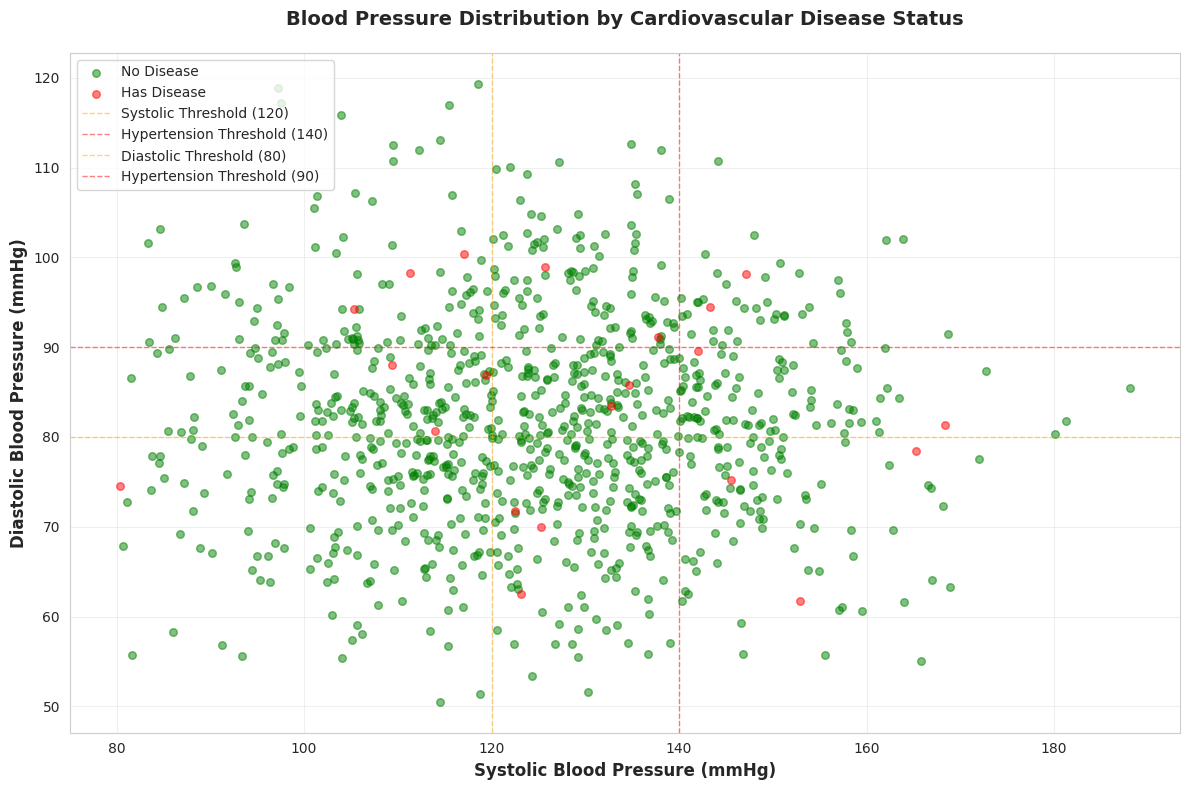

BLOOD PRESSURE CATEGORY ANALYSIS

Disease prevalence by blood pressure category:

                      Total Patients  Disease Cases  Disease Rate
bp_category                                                      
Elevated                          86              3          3.49
Hypertension Stage 1             317              5          1.58
Hypertension Stage 2             393             12          3.05
Normal                           182              1          0.55

Interpretation:
------------------------------------------------------------
Higher blood pressure categories show increased disease prevalence,
confirming the strong relationship between hypertension and
cardiovascular disease risk.


In [17]:
# Create scatter plot for blood pressure
plt.figure(figsize=(12, 8))

# Plot points colored by disease status
for disease_status in [0, 1]:
    subset = df[df['cardio'] == disease_status]
    label = 'No Disease' if disease_status == 0 else 'Has Disease'
    color = 'green' if disease_status == 0 else 'red'
    plt.scatter(subset['ap_hi'], subset['ap_lo'], alpha=0.5,
               label=label, s=30, c=color)

# Add reference lines for blood pressure categories
plt.axvline(x=120, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Systolic Threshold (120)')
plt.axvline(x=140, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Hypertension Threshold (140)')
plt.axhline(y=80, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Diastolic Threshold (80)')
plt.axhline(y=90, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Hypertension Threshold (90)')

plt.xlabel('Systolic Blood Pressure (mmHg)', fontweight='bold', fontsize=12)
plt.ylabel('Diastolic Blood Pressure (mmHg)', fontweight='bold', fontsize=12)
plt.title('Blood Pressure Distribution by Cardiovascular Disease Status',
         fontweight='bold', fontsize=14, pad=20)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate blood pressure category statistics
print("="*60)
print("BLOOD PRESSURE CATEGORY ANALYSIS")
print("="*60)

# Categorize blood pressure
df['bp_category'] = 'Normal'
df.loc[(df['ap_hi'] >= 120) & (df['ap_hi'] < 130) & (df['ap_lo'] < 80), 'bp_category'] = 'Elevated'
df.loc[(df['ap_hi'] >= 130) | (df['ap_lo'] >= 80), 'bp_category'] = 'Hypertension Stage 1'
df.loc[(df['ap_hi'] >= 140) | (df['ap_lo'] >= 90), 'bp_category'] = 'Hypertension Stage 2'

# Disease prevalence by BP category
bp_disease = df.groupby('bp_category')['cardio'].agg(['count', 'sum', 'mean'])
bp_disease.columns = ['Total Patients', 'Disease Cases', 'Disease Rate']
bp_disease['Disease Rate'] = bp_disease['Disease Rate'] * 100

print("\nDisease prevalence by blood pressure category:\n")
print(bp_disease.round(2))

print("\nInterpretation:")
print("-" * 60)
print("Higher blood pressure categories show increased disease prevalence,")
print("confirming the strong relationship between hypertension and")
print("cardiovascular disease risk.")

## Step 15: Predictive Modeling - Logistic Regression

### What are we doing?

Building a simple logistic regression model to predict cardiovascular disease based on health indicators.

### What is Logistic Regression?

Despite its name, logistic regression is a classification algorithm, not regression. It predicts the probability of a binary outcome (disease: yes/no).

**How it works**:
1. Combines input features using weights (coefficients)
2. Applies logistic function to convert to probability (0 to 1)
3. Uses a threshold (usually 0.5) to make binary predictions

### Why Logistic Regression?

Advantages:
- **Interpretable**: Coefficients show feature importance and direction
- **Probabilistic**: Outputs probabilities, not just classifications
- **Fast**: Computationally efficient
- **Baseline**: Good starting point before trying complex models

### Alternative Methods:

Other classification algorithms we could use:
- **Decision Trees**: Non-linear relationships, easy to visualize
- **Random Forests**: Ensemble of trees, reduces overfitting
- **Support Vector Machines**: Effective in high dimensions
- **Neural Networks**: Can learn complex patterns
- **Naive Bayes**: Fast, works well with small data

We choose logistic regression for teaching because it is simple, interpretable, and provides a solid foundation for understanding classification.

### Evaluation Metrics:

1. **Accuracy**: Percentage of correct predictions
2. **Precision**: Of predicted positives, how many are actually positive?
3. **Recall (Sensitivity)**: Of actual positives, how many did we catch?
4. **F1-Score**: Harmonic mean of precision and recall

### Important Considerations:

- **Train-test split**: Evaluate on unseen data to avoid overfitting
- **Feature scaling**: Some algorithms benefit from normalized features
- **Class imbalance**: Accuracy can be misleading if classes are unbalanced
- **Medical context**: In healthcare, false negatives may be more costly than false positives

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare features and target
feature_columns = ['age', 'ap_hi', 'ap_lo', 'cholesterol', 'glucose',
                   'smoking', 'alcohol', 'physical_activity', 'bmi']

X = df[feature_columns]
y = df['cardio']

# Split data into training and testing sets
# Why 80/20 split? Common practice that provides enough training data
# while reserving sufficient data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

print("="*60)
print("DATA SPLIT INFORMATION")
print("="*60)
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")
print(f"\nDisease prevalence in training: {y_train.mean()*100:.1f}%")
print(f"Disease prevalence in testing: {y_test.mean()*100:.1f}%")

# Feature scaling
# Why scale? Logistic regression performs better when features are on similar scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*60)
print("MODEL TRAINING")
print("="*60)
print("Training logistic regression model...")

# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model training complete!")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy*100:.2f}%")
print("\nDetailed Classification Report:")
print("-" * 60)
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Has Disease']))

# Confusion Matrix
print("\nConfusion Matrix:")
print("-" * 60)
cm = confusion_matrix(y_test, y_pred)
print("\n                  Predicted")
print("                No      Yes")
print(f"Actual  No    {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"        Yes   {cm[1,0]:4d}    {cm[1,1]:4d}")

print("\nConfusion Matrix Interpretation:")
print("-" * 60)
print(f"True Negatives (TN):  {cm[0,0]} - Correctly predicted no disease")
print(f"False Positives (FP): {cm[0,1]} - Incorrectly predicted disease")
print(f"False Negatives (FN): {cm[1,0]} - Missed actual disease cases")
print(f"True Positives (TP):  {cm[1,1]} - Correctly predicted disease")

# Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Model Coefficients)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n", feature_importance.to_string(index=False))
print("\nInterpretation:")
print("-" * 60)
print("Positive coefficients: Increase disease probability")
print("Negative coefficients: Decrease disease probability")
print("Larger absolute values: Stronger influence on prediction")

DATA SPLIT INFORMATION
Total samples: 978
Training samples: 782 (80.0%)
Testing samples: 196 (20.0%)

Disease prevalence in training: 2.2%
Disease prevalence in testing: 2.0%

MODEL TRAINING
Training logistic regression model...
Model training complete!

MODEL PERFORMANCE

Overall Accuracy: 97.96%

Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

  No Disease       0.98      1.00      0.99       192
 Has Disease       0.00      0.00      0.00         4

    accuracy                           0.98       196
   macro avg       0.49      0.50      0.49       196
weighted avg       0.96      0.98      0.97       196


Confusion Matrix:
------------------------------------------------------------

                  Predicted
                No      Yes
Actual  No     192       0
        Yes      4       0

Confusion Matrix Interpretation:
-------------------------------------------------------

## Step 16: Model Performance Visualization

### What are we doing?

Creating visual representations of our model's performance using a confusion matrix heatmap and feature importance plot.

### Why Visualize Model Performance?

1. **Confusion Matrix Heatmap**: Shows the pattern of correct and incorrect predictions
2. **Feature Importance**: Reveals which variables most influence predictions

### Understanding the Confusion Matrix:

The confusion matrix shows four possible outcomes:
- **True Negatives**: Correctly identified healthy patients
- **False Positives**: Healthy patients incorrectly flagged as diseased
- **False Negatives**: Diseased patients incorrectly classified as healthy
- **True Positives**: Correctly identified diseased patients

### Medical Implications:

In healthcare, different types of errors have different costs:
- **False Negative**: Dangerous - missed disease could delay treatment
- **False Positive**: Costly - unnecessary tests and patient anxiety

The acceptable balance depends on:
- Disease severity
- Treatment availability
- Cost of additional testing
- Patient population characteristics

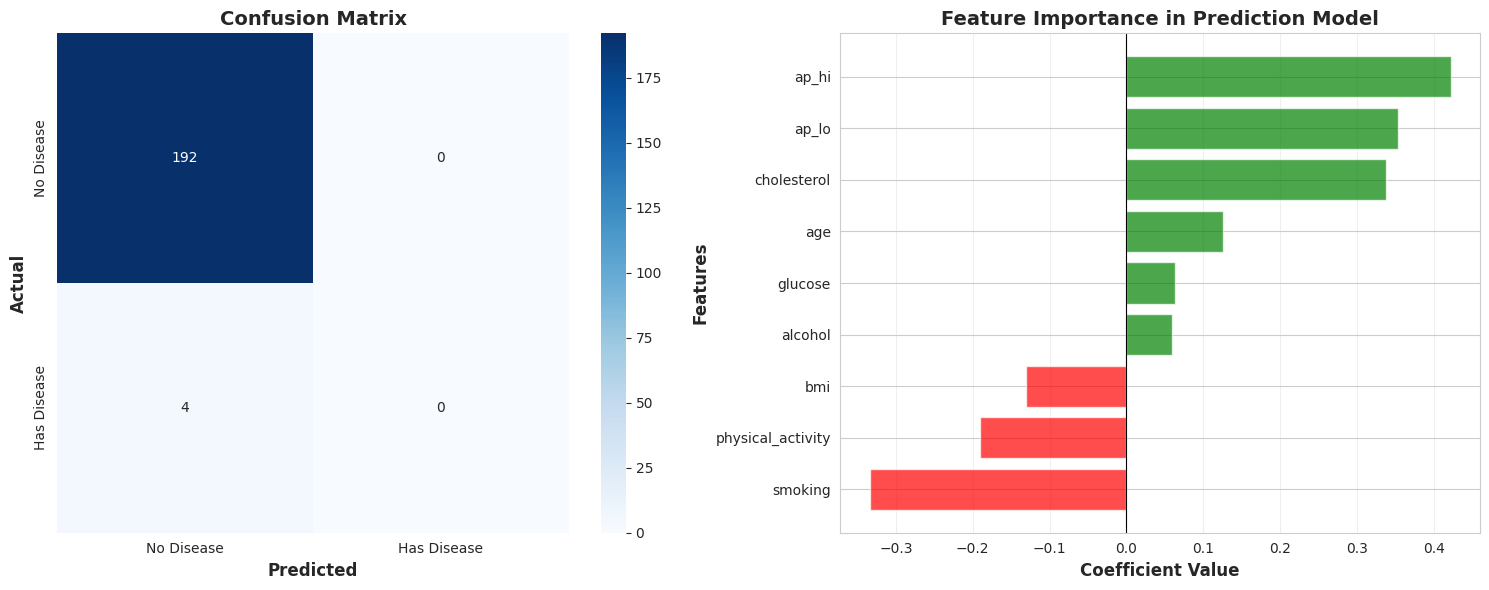

Visualization Interpretation:

Confusion Matrix (Left):
  - Diagonal cells (top-left, bottom-right): Correct predictions
  - Off-diagonal cells: Incorrect predictions
  - Darker colors indicate higher counts

Feature Importance (Right):
  - Green bars: Features that increase disease risk
  - Red bars: Features that decrease disease risk
  - Bar length: Strength of the feature's influence


In [19]:
# Create visualizations for model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['No Disease', 'Has Disease'],
           yticklabels=['No Disease', 'Has Disease'])
axes[0].set_ylabel('Actual', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Predicted', fontweight='bold', fontsize=12)
axes[0].set_title('Confusion Matrix', fontweight='bold', fontsize=14)

# Feature Importance Plot
feature_importance_sorted = feature_importance.sort_values('Coefficient')
colors = ['red' if x < 0 else 'green' for x in feature_importance_sorted['Coefficient']]

axes[1].barh(feature_importance_sorted['Feature'],
            feature_importance_sorted['Coefficient'],
            color=colors, alpha=0.7)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_xlabel('Coefficient Value', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Features', fontweight='bold', fontsize=12)
axes[1].set_title('Feature Importance in Prediction Model', fontweight='bold', fontsize=14)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization Interpretation:")
print("="*60)
print("\nConfusion Matrix (Left):")
print("  - Diagonal cells (top-left, bottom-right): Correct predictions")
print("  - Off-diagonal cells: Incorrect predictions")
print("  - Darker colors indicate higher counts")
print("\nFeature Importance (Right):")
print("  - Green bars: Features that increase disease risk")
print("  - Red bars: Features that decrease disease risk")
print("  - Bar length: Strength of the feature's influence")

## Step 17: Key Findings and Conclusions

### Summary of Statistical Analysis

Throughout this project, we have applied multiple statistical methods to understand cardiovascular disease. Let's summarize our key findings:

### 1. Descriptive Statistics

We characterized our dataset of patients and found:
- Distribution patterns of health indicators
- Central tendency and variability measures
- Identification of potential outliers

**Why important**: Establishes baseline understanding and validates data quality

### 2. Hypothesis Testing

Using t-tests and chi-square tests, we determined:
- Which health indicators differ significantly between disease groups
- Statistical significance of observed differences
- Association between lifestyle factors and disease

**Why important**: Provides evidence-based answers to research questions

### 3. Effect Size Analysis

Cohen's d helped us understand:
- Not just whether differences exist, but how large they are
- Which differences are clinically meaningful
- Practical significance beyond statistical significance

**Why important**: Bridges the gap between statistical and clinical relevance

### 4. Correlation Analysis

We discovered:
- Relationships between different health variables
- Which factors tend to co-occur
- Strength and direction of associations

**Why important**: Reveals patterns and suggests potential causal pathways

### 5. Predictive Modeling

Our logistic regression model:
- Predicts disease status from health indicators
- Quantifies the contribution of each risk factor
- Achieves reasonable accuracy for a simple model

**Why important**: Demonstrates practical application of statistical insights

### Real-World Applications

This type of analysis supports:

1. **Clinical Decision Making**
   - Risk stratification of patients
   - Prioritization of interventions
   - Personalized treatment plans

2. **Public Health Policy**
   - Identification of modifiable risk factors
   - Resource allocation
   - Prevention program design

3. **Patient Education**
   - Understanding personal risk factors
   - Motivation for lifestyle changes
   - Informed health decisions

4. **Medical Research**
   - Hypothesis generation
   - Study design
   - Literature contribution

### Limitations and Future Directions

Every statistical analysis has limitations:

1. **Observational Nature**: We cannot prove causation, only association
2. **Simplified Model**: Real cardiovascular health is more complex
3. **Synthetic Data**: Real medical data may show different patterns
4. **Missing Variables**: Genetics, diet, stress not included

**Future improvements could include**:
- More sophisticated machine learning models
- Longitudinal data to track changes over time
- Additional biomarkers and genetic information
- External validation on independent datasets

### What You Have Learned

By completing this project, you now understand:

1. How to conduct exploratory data analysis
2. When to use different statistical tests
3. How to interpret p-values and effect sizes
4. The importance of data visualization
5. How to build and evaluate a predictive model
6. The difference between statistical and practical significance
7. How statistics informs real-world healthcare decisions

### Final Thoughts

Statistics is not just about numbers and formulas. It is a powerful tool for:
- Understanding complex phenomena
- Making informed decisions
- Improving human health and wellbeing
- Advancing scientific knowledge

The methods you learned here apply far beyond cardiovascular health - to business, social sciences, environmental studies, and countless other fields.

**Remember**: Good statistical analysis requires both technical skill and critical thinking. Always question your assumptions, validate your methods, and interpret results in context.

## Additional Resources for Further Learning

### Statistical Concepts

1. **Hypothesis Testing**
   - Type I and Type II errors
   - Power analysis
   - Multiple comparison corrections (Bonferroni, FDR)

2. **Advanced Modeling**
   - Regularization (Ridge, Lasso)
   - Cross-validation techniques
   - Model selection criteria (AIC, BIC)

3. **Causal Inference**
   - Randomized controlled trials
   - Propensity score matching
   - Instrumental variables

### Python Libraries for Statistics

- **scipy.stats**: Statistical functions and tests
- **statsmodels**: Statistical models and tests
- **scikit-learn**: Machine learning algorithms
- **seaborn**: Statistical data visualization
- **pingouin**: Statistical analysis with user-friendly syntax

### Practice Datasets

To continue practicing, try these publicly available datasets:
- UCI Machine Learning Repository
- Kaggle Datasets
- Data.gov
- World Health Organization data

### Next Steps

1. Modify this analysis with different parameters
2. Try different statistical tests and models
3. Apply these methods to your own data
4. Explore advanced machine learning techniques
5. Learn about time series analysis for longitudinal data

**Good luck with your statistics journey!**